# Introduction

Sarcasm is a ype of speech that is made at the expense of someone or something. It generally has a negative conotation attached to it, and is sued to demaean someone o something. We have noticed sarcasm being used in our daily lives, but its usage is highly debatable, because some poeple find it funny, and some just find it out right humiliating. 
Many people believe that sarcasm can tell alot about a persons IQ, as it requires different parts of brains to work at the same time, same goes for its understanding, realizing that a remark is sarcastic or not requires different parts of brain, as its is highly contextual and because a sarcastic remark, uses irony and innuendos to hide the bluntness of the remark. 

So in this piepline we will building a ***Natural Language Processing(NLP) Model*** to understand sarcsm and label text as Sarcastic or not. 



# Datasets and Labels

The dataset we will be using in this pipeline can be found on Kaggle.com under the name of **Sarcasm Detection**.
The Dataset consistis of two columns labeled as,

1 - **Headlines** - The headlines column consist of different news headlines.

2 - **Target** - this column consists of 2 classes, ***Sarcastic and Non-Sarcastic***


## Overview of this pipeline

In this pipeline we will be training Machine Learning models, by firstly going throught Data Collection, then moving to Data Exploration and preprocessing. Second Stage of this pipeline will the Feature Engineering, where we will engineer the data, so it is easily readable by the Machine. The third stage of this pipeline will consist of Training and Testing the Machine Learning Models, in this pipeline we will be using 3 Models, One Supervised and Two Unsupervised Models namely, ***K-Nearest Neighbours,Support Vector Machine and Random Forest Classifier***.

The most important step of any pipeline is the importing of libraries, so lets start by

# Importing the Libraries

In [2]:
import pandas                        as pd

from sklearn.model_selection         import train_test_split, GridSearchCV
from sklearn.preprocessing           import LabelEncoder
from sklearn.ensemble                import RandomForestClassifier
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.svm                     import SVC
from sklearn.metrics                 import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics                 import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize                   import sent_tokenize, word_tokenize
from nltk.stem                       import WordNetLemmatizer
from nltk.corpus                     import stopwords
from nltk                            import pos_tag

from wordcloud                       import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot             as plt

import string
import nltk
import re

# Loading the Datasets

In [2]:
df = pd.read_csv('../../Desktop/Assignment/NLP/archive (18)/news/Data.csv')


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Categories),Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office",Sarcastic
2,New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


# Data Exploration & Preprocessing

Once the dataset has been loaded, we can dive into it and start by loooing at its dimensions,

In [3]:
df.shape

(12506, 2)

Now we know that the Dataset consists of **12506 Rows and 2 Columns**, now lets look at the Data types of the variables,

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


Here, we can see that the Data type of both the columns is Object, which is good enough for now but to ensure that the machine can interpret it we will need to convert it into numbers. This conversion will take place in the Feature Enigneering stage og this pipeline. 

So for now lets look for other insights, such as, missing values,

In [5]:
df.isna().sum()

headlines    0
target       0
dtype: int64

We can see that there are no missing values in this dataset. So lets move onto look at the unique values in the ***Taregt*** columns.

In [6]:
df['target'].unique()

array(['Non Sarcastic', 'Sarcastic'], dtype=object)

There are only two values, ***Sarcastic and Non-Sarcastic***. Now we need to look the count of both of these values,

In [7]:
df['target'].value_counts()

Non Sarcastic    6531
Sarcastic        5975
Name: target, dtype: int64

<AxesSubplot:>

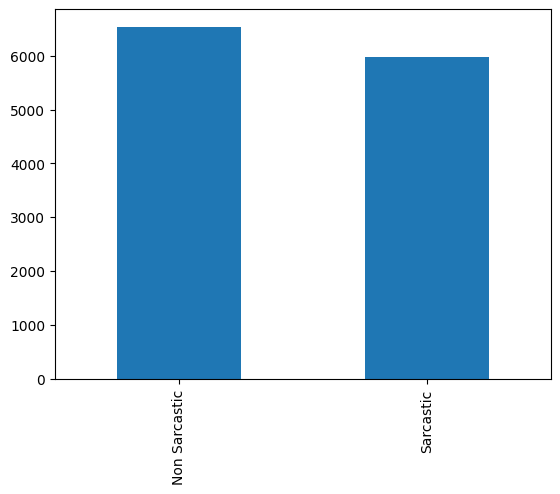

In [8]:
df['target'].value_counts().plot(kind = 'bar')

Over here we see that, ***Non Sarcastic*** class consists of ***6531 values*** and the ***Sarcastic*** class consists of ***5975 values***. On thing to notice over here is that both the classes are roughly balanced, If one of these class would have been significantly larger then the other then we would have done over sampling, but for this dataset we wont be needing it.

## Wordcloud of Sarcastic & Non Sarcastic News Headlines

Now we will be plotting wordclouds to see which word is oftenly used in sarcastic and non sarcastic headlines.

In [9]:
sarc = pd.DataFrame(df[(df['target'] == 'Sarcastic')])
nsarc = pd.DataFrame(df[(df['target'] == 'Non Sarcastic')])

In [10]:
sarc.head()

,headlines,target
1,"‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office",Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic
7,Federal Prisons Reinstitute Executions By Lethal Inflation,Sarcastic
13,Soldier Back Home From Serving At Mexico Border Still Having Nightmares About Being Used As Political Prop,Sarcastic
14,Decades Of Breathing Really Starting To Catch Up With Chinese Man,Sarcastic


In [11]:
nsarc.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Categories),Non Sarcastic
2,New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris,Non Sarcastic
5,Global Aid Pours into Haiti,Non Sarcastic
6,CNN Anchor Calls Obama Protester 'Rude' And 'Crazy',Non Sarcastic


### Sarcastic Headlines

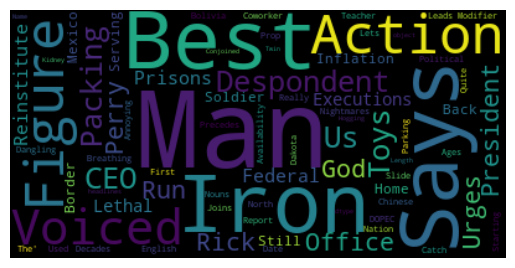

In [12]:
wordcloud = WordCloud().generate(str(sarc['headlines']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud above shows, that words like **Man, Best, Iron, Action, Figure** are mostly associated with being Sarcastic.

### Non Sarcastic Headlines

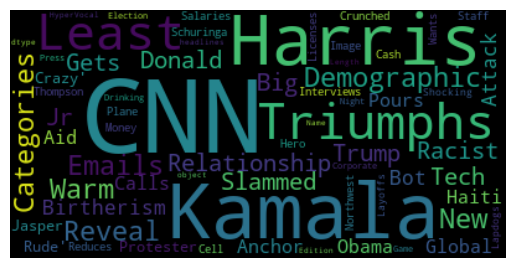

In [13]:
wordcloud = WordCloud().generate(str(nsarc['headlines']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This wordcloud shows that words like **Kamala, CNN, Triumphs, Harris and Demographic** are mostly associated with being Non-Sarcastic.

## Defining Stopwords, Punctuations & Lemmatizer

Now moving to one of the most important steps of any NLP pipeline, here we will be cleaning the textual data. 

By cleaning we mean removing punctuations, stopwards, emojis, numbers, usernames and hashtags. It is important to remove these becaus with them the machine cannot understant the textual data.

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stwd = stopwords.words('english')

puncts = list(string.punctuation)

lem = WordNetLemmatizer()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHAHEER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHAHEER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHAHEER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## All Purpose Function

Here we will define a function, that will first convert the text to lower case, then strip the data of everythign except the alphabetical characters. Then it will tokenize all the words and lemmatize them.

In [15]:
def data(text):
    text = text.lower()  
    
    text = re.sub('[^a-zA-Z]'," ", text)
                        
    tokens = word_tokenize(text)
    
    tokens = [token for token in tokens if token not in stwd and token not in puncts]
    
    tokens=[lem.lemmatize(token) for token in tokens]
    
    text=" ".join(tokens)
    
    return text

Now that we have defined an all purpose function, we will apply this to the headlines columns.

In [16]:
df['headlines'] = df['headlines'].apply(data)

In [17]:
df

,headlines,target
0,cnn triumph least demographic category,Non Sarcastic
1,best could say iron man action figure voiced despondent toy r u ceo packing office,Sarcastic
2,new email reveal warm relationship kamala harris big tech,Non Sarcastic
3,donald trump jr get slammed racist birtherism bot attack kamala harris,Non Sarcastic
4,god urge rick perry run president,Sarcastic
...,...,...
12501,lapdog corporate press,Non Sarcastic
12502,annoying coworker precedes noun quite,Sarcastic
12503,report north dakota lead nation parking availability,Sarcastic
12504,election night drinking game hypervocal edition,Non Sarcastic


After the application of the function we can see that all the punctuations, stopwords and numbers have been removed. They have also been tokenized and Lemmarized.

Now that the data has been preprocessed and cleaned we will need to split it inot two sub datasets, named Training and Testing. We do this so train the machine on one dataset and evaluate the machine on the other. So lets start by,

## Spliting the Dataset into Test & Train

In [18]:
df_train, df_test = train_test_split(df, random_state = 42)
print(df_train.shape, df_test.shape)

(9379, 2) (3127, 2)


In [19]:
df_train

,headlines,target
9607,nation sexual degenerate impatient gay marriage slippery slope kick,Sarcastic
7665,like witness execution,Non Sarcastic
7176,larry flynt promise make god famous nude photo shoot,Sarcastic
5981,blood soaked mayor bloomberg announces homelessness longer problem new york city,Sarcastic
349,arianna discus health care reform resolution condemning joe wilson cnn video,Non Sarcastic
...,...,...
11964,new york democratic debate suddenly seems lot important,Non Sarcastic
5191,kamala harris aide accused running rogue police force claiming year old,Non Sarcastic
5390,elizabeth warren another good debate poll find,Non Sarcastic
860,state department spokeswoman bash cnn missing event closed press,Non Sarcastic


With this we end the Preprocessing phase of our pipeline and move onto the Feature Engineering Phase.

# Feature Engineering

The very step of any feature engineerig phase in to split the Training and Testing Datasets into its Feature and Target Variabels.

## Seperating Features and Target Variables

In [20]:
x_train = df_train['headlines']
y_train = df_train['target']

x_test = df_test['headlines']
y_test = df_test['target']

print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

x_test: (3127,)
y_test: (3127,)
x_train: (9379,)
y_train: (9379,)


## Term Frequency-Independent Document Frequency (TF-IDF) Vectorizer

As we are aware that machines are incapable of interpreting string, and require a numerical input. So to make it easier for the machine we will be using **TF-IDF Vectorizer** to vectorize the headlines in the dataset. In simple words, vectorizing is the processs of converting words into vectors by assigning them a numerical value. This makes it readable for he machine. So lets start by,

In [21]:
vect = TfidfVectorizer()
vect.fit(x_train)
x_train = vect.transform(x_train)
x_test = vect.transform(x_test)

In [22]:
x_train.shape

(9379, 13047)

## Categorical Encoding of Target Variable

Here we will be encoding categorical attributes, so the Traget column, as a machine does no understand the terms **Sarcastic and Non-Sarcastic**, so we will encode them in two classes **1 and 0**.

In [23]:
label = LabelEncoder()
label.fit(y_train)
y_train = label.transform(y_train)
y_test= label.transform(y_test)
print(y_train.shape)

(9379,)


With categorical encoding we are done with the Feature Enigneering Phase of this pipeline and will be moving onto the Model Training and Testing Phase.

# Model Training & Testing

Looking at the Dataset, we can identify that this is a binary classification probelm and will be needing Classification Models, so we will be working with ***K-Nearest Neighbors, Random Forest Classifier and Support Vector Machine***.

During the training phase we will also be conducting a **GridSearch** to find the best hyperparameters for the said models.

## K Nearest Neighbors

Lets start by, defining the Model, a dictionary of its hyperparameters and conducting Grid Search.

In [24]:
KNN = KNeighborsClassifier()
params_knn= {
    'n_neighbors': range(1,21,2),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean', 'minkowski']
}
gs_knn = GridSearchCV(KNN, param_grid = params_knn, cv=5)
gs_knn.fit(x_train, y_train)
gsdf_knn = pd.DataFrame(gs_knn.cv_results_)
gsdf_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001995,6.304496e-04,0.968408,0.060855,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",0.526119,0.642324,0.526119,0.527186,0.526400,0.549630,0.046349,41
1,0.001795,7.463792e-04,0.825990,0.010062,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'}",0.526119,0.642324,0.526119,0.527186,0.526400,0.549630,0.046349,41
2,0.001594,4.901635e-04,0.942879,0.029335,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",0.523987,0.585821,0.523454,0.523454,0.523200,0.535983,0.024920,48
3,0.001995,3.568323e-07,0.871662,0.005268,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}",0.524520,0.585821,0.523987,0.523454,0.523200,0.536197,0.024816,47
4,0.001994,1.092537e-03,1.084500,0.068810,manhattan,5,uniform,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}",0.544776,0.555437,0.538380,0.535714,0.544000,0.543661,0.006798,43
5,0.001995,1.081065e-06,0.948661,0.028395,manhattan,5,distance,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}",0.544776,0.555437,0.538913,0.535181,0.544000,0.543661,0.006848,43
6,0.001596,4.923271e-04,0.999725,0.015578,manhattan,7,uniform,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}",0.541045,0.544776,0.533582,0.533582,0.544000,0.539397,0.004908,46
7,0.002001,1.171021e-05,0.937885,0.012298,manhattan,7,distance,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}",0.541045,0.545309,0.534115,0.533049,0.544000,0.539504,0.005040,45
8,0.001594,4.726060e-04,0.992347,0.016202,manhattan,9,uniform,"{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}",0.533582,0.536247,0.529851,0.531450,0.540267,0.534279,0.003683,49
9,0.001600,4.927959e-04,0.928504,0.010981,manhattan,9,distance,"{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}",0.533582,0.536247,0.529851,0.530917,0.540267,0.534173,0.003770,50


Once the model has been trained we will take a look at the best hyperparameters found during the Grid Search,

In [25]:
print("\n The best score across ALL searched params:\n",gs_knn.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_knn.best_params_)


 The best score across ALL searched params:
 0.7643664534470505

 The best parameters across ALL searched params:
 {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}


Now that we know the best hyperparameters and scores, we will use them to test the model on the testing Dataset,

                             0
Model      K Nearest Neighbors
F1 Score              0.683946
Accuracy              0.758235
Precision              0.92221
Recall                0.543522


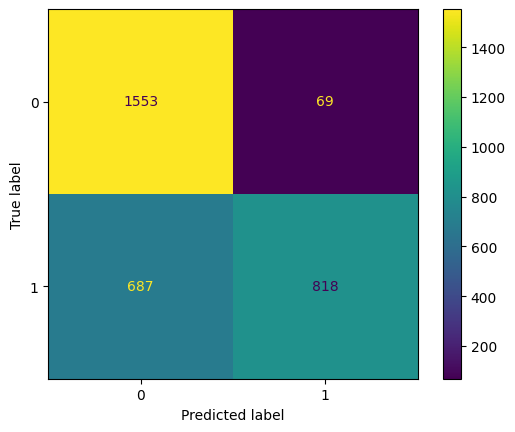

In [26]:
y_pred_knn = gs_knn.best_estimator_.predict(x_test)
cfx_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn =  f1_score(y_test, y_pred_knn)
accu_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
s_knn = pd.Series({'Model': 'K Nearest Neighbors', 
               'F1 Score': f1_knn, 
               'Accuracy': accu_knn,
               'Precision': prec_knn,
               'Recall' : rec_knn})
s_knn = pd.DataFrame(s_knn)
print(s_knn)

ConfusionMatrixDisplay(cfx_knn).plot()

From the above values we can tell that our model has been trained with a **F1 score of 68.39%, Accuracy of 75.82%, Precision of 92.21% and Recall of 54.35%**. Now we will move to another model:

## Random Forest Classifier

Here, we will also start by defining the Model, a dictionary of its hyperparameters and conducting Grid Search.

In [27]:
rfc = RandomForestClassifier()

param = {
    'n_estimators' : range(100, 500, 100),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10]
}
gs_rfc = GridSearchCV(rfc, param_grid = param, cv = 5)
gs_rfc.fit(x_train, y_train)
gsdf_rfc = pd.DataFrame(gs_rfc.cv_results_)
gsdf_rfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.507778,0.037133,0.025327,0.001007,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}",0.767058,0.754797,0.751066,0.810235,0.758933,0.768418,0.021573,4
1,3.056215,0.159280,0.052061,0.008504,gini,10,200,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}",0.789446,0.761727,0.784648,0.801706,0.772800,0.782065,0.013758,1
2,4.715192,0.255179,0.080584,0.019084,gini,10,300,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}",0.771855,0.753731,0.759595,0.786780,0.760000,0.766392,0.011772,6
3,10.949896,0.801103,0.200863,0.036879,gini,10,400,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 400}",0.770256,0.758529,0.770256,0.780384,0.764800,0.768845,0.007210,3
4,2.478371,0.207362,0.047471,0.011997,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}",0.748401,0.760661,0.756397,0.786247,0.752533,0.760848,0.013334,8
5,4.604878,0.026622,0.082979,0.004388,entropy,10,200,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}",0.768657,0.777719,0.769723,0.773454,0.748267,0.767564,0.010159,5
6,7.110177,0.211009,0.136036,0.029454,entropy,10,300,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}",0.754797,0.748401,0.775053,0.787846,0.744533,0.762126,0.016615,7
7,9.329040,0.149886,0.157378,0.006776,entropy,10,400,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}",0.778785,0.762793,0.772921,0.773987,0.770667,0.771831,0.005239,2


After model training we will be looking at this best scores and hyperparameters.

In [28]:
print("\n The best score across ALL searched params:\n",gs_rfc.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_rfc.best_params_)


 The best score across ALL searched params:
 0.782065330490405

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}


Now that we know the best Scores and Hyperparameters, we can move onto the testing stage.

                                  0
Model      Random Forest Classifier
F1 Score                   0.679717
Accuracy                   0.754077
Precision                  0.910714
Recall                     0.542193


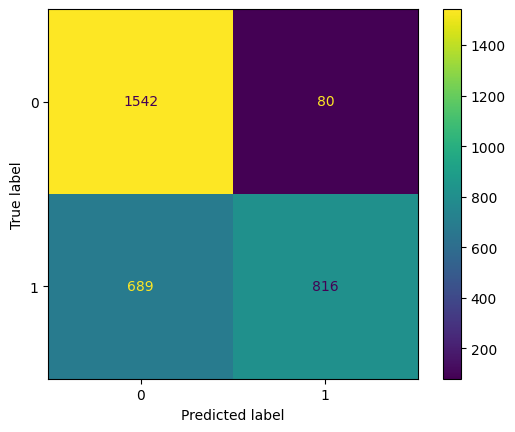

In [29]:
y_pred_rfc = gs_rfc.best_estimator_.predict(x_test)
cfx_rfc = confusion_matrix(y_test, y_pred_rfc)
f1_rfc =  f1_score(y_test, y_pred_rfc)
accu_rfc = accuracy_score(y_test, y_pred_rfc)
prec_rfc = precision_score(y_test, y_pred_rfc)
rec_rfc = recall_score(y_test, y_pred_rfc)
s_rfc = pd.Series({'Model': 'Random Forest Classifier', 
               'F1 Score': f1_rfc, 
               'Accuracy': accu_rfc,
               'Precision': prec_rfc,
               'Recall' : rec_rfc})
s_rfc = pd.DataFrame(s_rfc)
print(s_rfc)

ConfusionMatrixDisplay(cfx_rfc).plot()


From the above values we can tell that our model has been trained with a **F1 score of 67.97%, Accuracy of 75.40%, Precision of 91.07% and Recall of 54.21%**. Now we will move to another model:

## Support Vector Machine

Starting by defining the Model, a dictionary of its hyperparameters and conducting Grid Search.

In [30]:
svm = SVC()
param = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'rbf']
}
gs_svm = GridSearchCV(svm, param_grid = param, cv =5)
gs_svm.fit(x_train, y_train)
gs_svm.cv_results_
gsdf_svm = pd.DataFrame(gs_svm.cv_results_)
gsdf_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.776221,0.267650,0.773131,0.030404,1,linear,"{'C': 1, 'kernel': 'linear'}",0.870469,0.857676,0.873134,0.878465,0.876267,0.871202,0.007289,5
1,7.339363,0.135793,1.290149,0.078491,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.871002,0.860874,0.874733,0.872068,0.878933,0.871522,0.005986,4
2,5.014384,0.131951,0.671803,0.027679,10,linear,"{'C': 10, 'kernel': 'linear'}",0.845949,0.838486,0.848614,0.863006,0.853333,0.849878,0.008138,6
3,7.598470,0.160860,1.267011,0.061717,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.877399,0.865139,0.882196,0.883262,0.881067,0.877812,0.006638,1
4,5.064649,0.290871,0.654050,0.013162,100,linear,"{'C': 100, 'kernel': 'linear'}",0.843284,0.840085,0.848614,0.857143,0.853867,0.848598,0.006348,7
5,7.817485,0.322931,1.237689,0.013187,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.877399,0.865139,0.882196,0.883262,0.881067,0.877812,0.006638,1
6,5.017178,0.124687,0.649063,0.010373,1000,linear,"{'C': 1000, 'kernel': 'linear'}",0.833689,0.840085,0.838486,0.851812,0.833600,0.839534,0.006656,8
7,6.165495,1.390849,0.932718,0.158639,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",0.877399,0.865139,0.882196,0.883262,0.881067,0.877812,0.006638,1


After model training we will be looking at this best scores and hyperparameters.

In [31]:
print("\n The best score across ALL searched params:\n",gs_svm.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_svm.best_params_)


 The best score across ALL searched params:
 0.8778124804548686

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}


                                 0
Model      Support Vector Machines
F1 Score                  0.874244
Accuracy                  0.873681
Precision                 0.839242
Recall                    0.912292


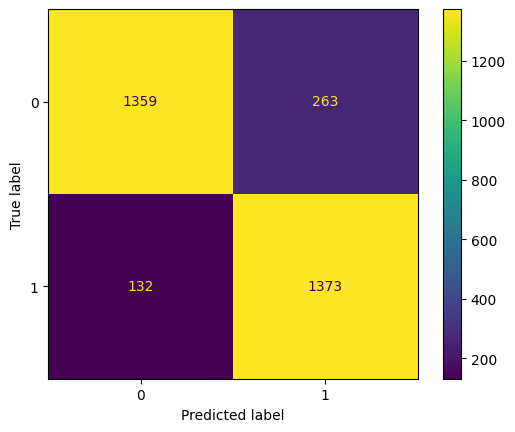

In [32]:
y_pred_svm = gs_svm.best_estimator_.predict(x_test)
cfx_svm = confusion_matrix(y_test, y_pred_svm)
f1_svm =  f1_score(y_test, y_pred_svm)
accu_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
s_svm = pd.Series({'Model': 'Support Vector Machines', 
               'F1 Score': f1_svm, 
               'Accuracy': accu_svm,
               'Precision': prec_svm,
               'Recall' : rec_svm})
s_svm = pd.DataFrame(s_svm)
print(s_svm)

ConfusionMatrixDisplay(cfx_svm).plot()

From the above values we can tell that our model has been trained with a **F1 score of 87.42%, Accuracy of 87.36%, Precision of 83.92% and Recall of 91.22%**.

With this we are done with our Training and Testing Phase of this pipeline, now lets move onto the final stage of this pipeline,

# Metric Evaluation

In this final Step, we will be analyse the results of the prior trained and tested models, to make the analysis easier we will concatenate the Results of the three models into one Table,

In [33]:
score = pd.concat([s_svm, s_rfc, s_knn], axis=1, ignore_index=True)
score

,0,1,2
Model,Support Vector Machines,Random Forest Classifier,K Nearest Neighbors
F1 Score,0.874244,0.679717,0.683946
Accuracy,0.873681,0.754077,0.758235
Precision,0.839242,0.910714,0.92221
Recall,0.912292,0.542193,0.543522


Looking at the table above, we can see that **Support Vector Machines** out performs all other models, with a staggering **F1 score** of **87.42%**. Whereas, **K-Nearest Neighbors** comes in second place with a **F1 score** of **68.39%** and in the last we have Random Forest Classifier with an **F1 score** of **67.97%**.

# Conslusion

Reviewing all the steps above, we were tasked to create a Machine Learning that can accuratly identify sarcasm in Newsheadlines. So to realize it, we used many Machine Learning and Python techniqes, we used libraries from ***Pandas, Sklearn, Matplotlib, NLTK, RE and String***. With the help of these libraries we Trained three Machine Learning models, naely, ***K-Nearest Neighbors, Random Forest Classifier and Support Vector Machines***. Once Trained, we tested the models, and calculated the metrics. With the last step being Metric Evaluation. 

# References

1- Data Set on Sarcastic Headlines - https://www.kaggle.com/datasets/theynalzada/news-headlines-for-sarcasm-detection

2 - The Neuroanatomical Basis of Understanding Sarcasm and Its Relationship to Social Cognition. https://psycnet.apa.org/doiLanding?doi=10.1037%2F0894-4105.19.3.288